# Diabetes Classification and Clustering Project

This project provides a pipeline for cleaning, analyzing, and modeling a diabetes dataset. Key tasks include:

- **Data Preparation**: Handling missing values, outliers, inconsistent, and encoding categorical data.
- **EDA**: Visualizing distributions and feature insights.
- **Classification**: Custom implementations of Decision Tree (ID3) and K-Nearest Neighbors with performance evaluation.
- **Clustering**: Custom K-Means and Hierarchical Clustering for pattern discovery.
- **Visualization**: Intuitive plots for trees, clusters, and data analysis.


# Installing and Importing Libraries
This section installs the necessary Python libraries and imports them for use in the project.

In [2]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install seaborn
# !pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import math
import copy
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

# Loading the Dataset
The dataset is loaded into a DataFrame to enable data exploration and preprocessing.

In [4]:
df = pd.read_csv("modified_diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,unknown,78.0,0,1,never,101.665015,6.6,140,0
1,Female,NaN,0,0,No Info,28.034572,6.6,80,0
2,Male,28.0,0,0,NaN,25.369152,5.7,9999,0
3,Female,37.0,0,0,yes,25.262602,NaN,155,0
4,Male,75.0,1,1,current,23.212811,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99996,Female,-1.0,0,0,No Info,18.624383,6.5,100,0
99997,Male,70.0,0,0,former,27.804892,5.7,155,0
99998,Female,23.0,0,0,never,35.913652,4.0,100,0
99999,Female,54.0,0,0,current,21.607675,6.6,90,0


# Identifying Missing Values
This block identifies null or missing values in the dataset, along with the records containing them.

In [5]:
print(f"The count of null cells in each column is:\n{df.isnull().sum()}")
print(f"Records with null values:\n{df[df.isnull().any(axis=1)]}")

The count of null cells in each column is:
gender                 0
age                    2
hypertension           0
heart_disease          0
smoking_history        1
bmi                    0
HbA1c_level            1
blood_glucose_level    0
diabetes               0
dtype: int64
Records with null values:
        gender   age  hypertension  heart_disease smoking_history        bmi  \
1       Female   NaN             0              0         No Info  28.034572   
2         Male  28.0             0              0             NaN  25.369152   
3       Female  37.0             0              0             yes  25.262602   
100000  Female   NaN             0              0         No Info  25.698752   

        HbA1c_level  blood_glucose_level  diabetes  
1               6.6                   80         0  
2               5.7                 9999         0  
3               NaN                  155         0  
100000          6.6                   80         0  


# Distinct Values in Columns
Displays unique values in each column along with their counts to better understand the dataset.

In [6]:
print("Distinct Values for each column with count of each one are: ")
for column in df.columns:
    print(df[column].value_counts().sort_index())

Distinct Values for each column with count of each one are: 
gender
Female     58552
Male       41430
Other         18
unknown        1
Name: count, dtype: int64
age
-4.92       1
-4.84       3
-4.76       9
-4.68      10
-4.60       6
         ... 
 80.00    865
 81.00    732
 82.00    652
 83.00    614
 84.00    571
Name: count, Length: 222, dtype: int64
hypertension
0    92516
1     7485
Name: count, dtype: int64
heart_disease
0    96059
1     3942
Name: count, dtype: int64
smoking_history
No Info        35817
current         9285
ever            4004
former          9352
never          35094
not current     6447
yes                1
Name: count, dtype: int64
bmi
3.629572      1
6.193520      1
6.982869      1
7.532593      1
7.544648      1
             ..
90.363434     1
91.267779     1
94.896635     1
95.790427     1
101.665015    1
Name: count, Length: 100001, dtype: int64
HbA1c_level
3.5    7662
4.0    7542
4.5    7585
4.8    7597
5.0    7470
5.7    8413
5.8    8321
6.0    8295

# Data Cleaning: Replacing Invalid Values
Replaces invalid or inconsistent values in specific columns to prepare the dataset for analysis. Visualizing the BMI distribution using histograms and boxplots, and calculates its skewness helps to remove BMI values that are outside a reasonable range to ensure data consistency.

In [7]:
df.replace({"gender": {"unknown": np.nan, "Other": np.nan}}, inplace=True)
df.replace({"smoking_history": {"yes": "current"}}, inplace=True)
df.replace({"blood_glucose_level": {9999: np.nan}}, inplace=True)
df["age"] = df["age"].where(df["age"] >= 0, np.nan)

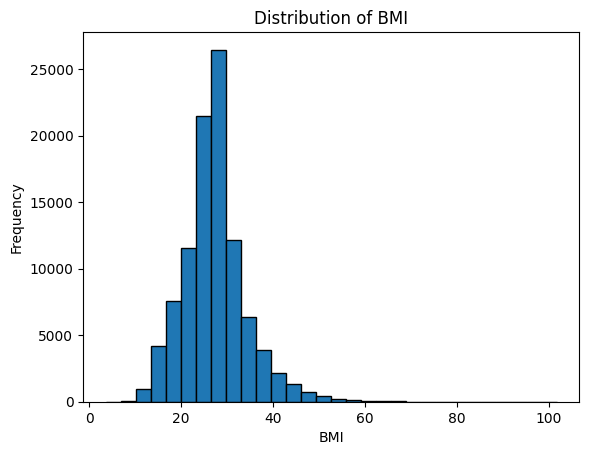

Skewness of BMI: 0.9188249993707738


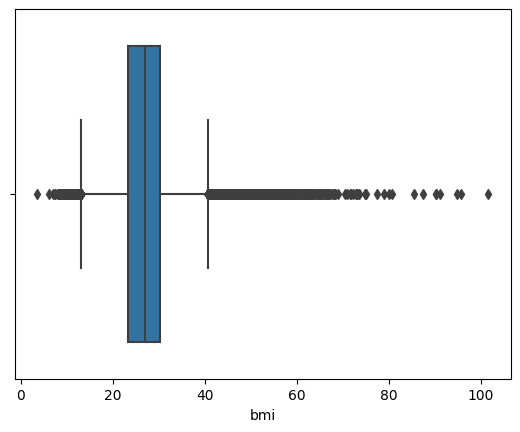

In [8]:
df["bmi"].plot(kind="hist", bins=30, edgecolor="black")
plt.xlabel("BMI")
plt.title("Distribution of BMI")
plt.show()
skewness = skew(df["bmi"])
print(f"Skewness of BMI: {skewness}")
sns.boxplot(x="bmi", data=df)
plt.show()

In [9]:
df["bmi"] = df["bmi"].where((df["bmi"] >= 10) & (df["bmi"] <= 60), np.nan)

# Removing Duplicate Records
Identifies and removes duplicate rows from the dataset to avoid redundancy.

In [10]:
print("Duplicate records are: ")
duplicates = df[df.duplicated(keep=False)]
print(duplicates)
df = df.drop_duplicates()

Duplicate records are: 
      gender  age  hypertension  heart_disease smoking_history  bmi  \
47023   Male  NaN             0              0         No Info  NaN   
63979   Male  NaN             0              0         No Info  NaN   

       HbA1c_level  blood_glucose_level  diabetes  
47023          4.5                126.0         0  
63979          4.5                126.0         0  


# Imputing Missing Values
Fills missing values in the `age` and `bmi` columns using random sampling based on their distributions.

In [11]:
for column in ["age", "bmi"]:
    value_counts = df[column].value_counts(normalize=True)
    df.loc[df[column].isna(), column] = np.random.choice(
        value_counts.index.tolist(), size=df[column].isna().sum(), p=value_counts.values
    )

# Dropping Remaining Missing Values
Removes records with remaining null values to ensure a clean and complete dataset for analysis.

In [12]:
df = df.dropna()

# Balancing and Preparing the Dataset
This section balances the dataset by sampling equal proportions of diabetic and non-diabetic records for training. It also bins continuous features (e.g., age, BMI, HbA1c levels) into categories and encodes target labels for easier model training.

In [13]:
df = df.reset_index(drop=True)
df_zero = df[df["diabetes"] == 0]
df_one = df[df["diabetes"] == 1]
sample_size = int(len(df_one) * 0.7)
zero_sample = df_zero.sample(n=sample_size, random_state=42)
one_sample = df_one.sample(n=sample_size, random_state=42)
balanced_train = pd.concat([zero_sample, one_sample])
balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = df.drop(balanced_train.index).reset_index(drop=True)
train_data = balanced_train
attribute = train_data.columns.to_list()[:-1]
for col in attribute:
    if col == "age":
        bins = [0, 24, 54, float("inf")]
        labels = ["Youth", "Middle", "Old"]
        train_data[col] = pd.cut(
            train_data[col], bins=bins, labels=labels, include_lowest=True
        )
        test_data[col] = pd.cut(
            test_data[col], bins=bins, labels=labels, include_lowest=True
        )
    elif col in ["bmi", "HbA1c_level", "blood_glucose_level"]:
        if col == "bmi":
            bins = [0, 18.5, 24.9, float("inf")]
        elif col == "HbA1c_level":
            bins = [0, 5.7, 6.5, float("inf")]
        elif col == "blood_glucose_level":
            bins = [0, 140, 200, float("inf")]
        train_data[col] = pd.cut(
            train_data[col], bins=bins, labels=["Low", "Normal", "High"]
        )
        test_data[col] = pd.cut(
            test_data[col], bins=bins, labels=["Low", "Normal", "High"]
        )
    elif col in ["gender", "hypertension", "heart_disease"]:
        pass
train_data["diabetes"] = train_data["diabetes"].map({0: "No", 1: "Yes"})
test_data["diabetes"] = test_data["diabetes"].map({0: "No", 1: "Yes"})
X_train = train_data.iloc[:, :].values
X_test = test_data.iloc[:, :].values

# Decision Tree Classifier
Implements a Decision Tree classifier from scratch using ID3 algorithm. This block includes:
- Calculating entropy and information gain.
- Building the decision tree recursively.
- Predicting outcomes and evaluating the tree on training and test data.
- Visualizing the final decision tree structure.

Decision-Tree classification results:
Train Metrics:
Accuracy: 0.76, Precision: 1.00, Recall: 0.52, F1-Score: 0.68
Confusion Matrix (Train):
 [[3098 2852]
 [   0 5950]]

Test Metrics:
Accuracy: 0.94, Precision: 0.74, Recall: 0.52, F1-Score: 0.61
Confusion Matrix (Test):
 [[ 3866  3620]
 [ 1392 79201]]


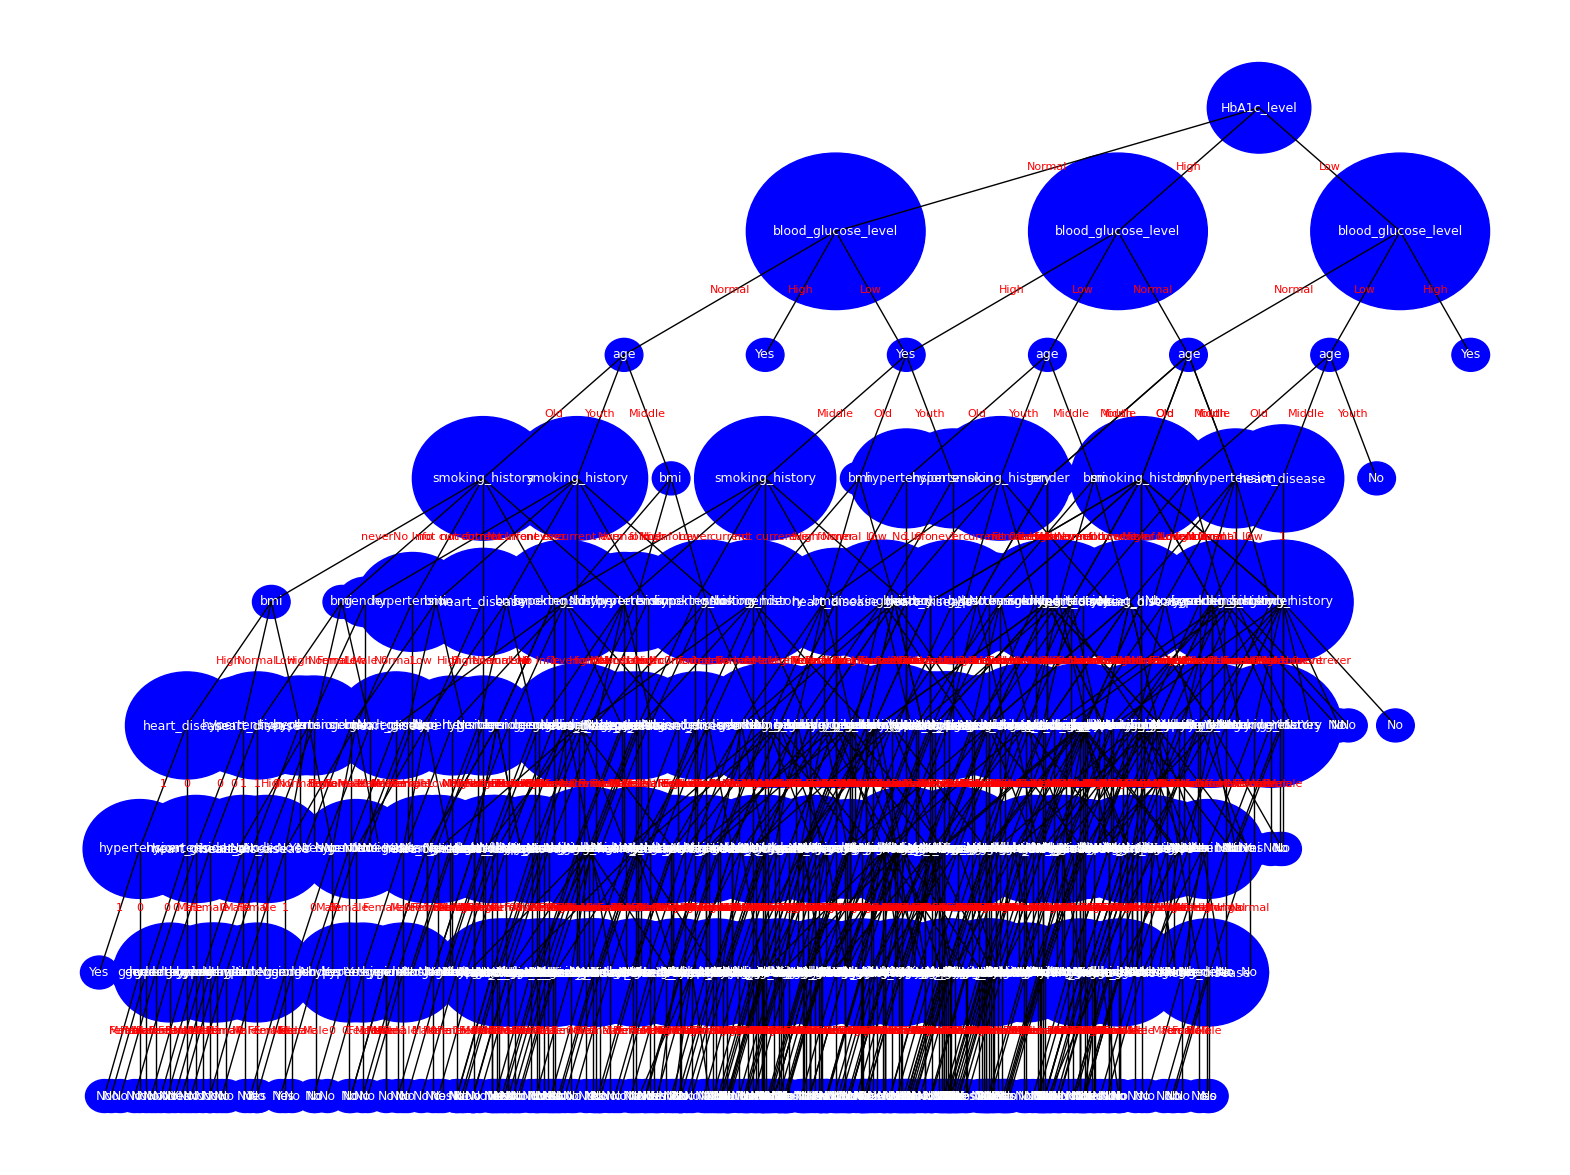

In [14]:
print("Decision-Tree classification results:")


class Node(object):
    def __init__(self):
        self.value = None
        self.decision = None
        self.childs = []


def findEntropy(data, rows):
    yes, no, ans = 0, 0, -1
    idx = len(data[0]) - 1
    for i in rows:
        if data[i][idx] == "Yes":
            yes += 1
        else:
            no += 1
    if yes + no != 0:
        x, y = yes / (yes + no), no / (yes + no)
    else:
        x, y = 0, 0
    if x == 1:
        ans = 1
    elif y == 1:
        ans = 0
    entropy = -1 * (x * math.log2(x) + y * math.log2(y)) if x != 0 and y != 0 else 0
    return entropy, ans


def findMaxGain(data, rows, columns):
    maxGain, retidx = 0, -1
    entropy, ans = findEntropy(data, rows)
    if entropy == 0:
        return maxGain, retidx, ans
    for j in columns:
        mydict = {}
        for i in rows:
            key = data[i][j]
            mydict[key] = mydict.get(key, 0) + 1
        gain = entropy
        for key in mydict:
            yes = no = 0
            for k in rows:
                if data[k][j] == key:
                    if data[k][-1] == "Yes":
                        yes += 1
                    else:
                        no += 1
            if yes + no != 0:
                x, y = yes / (yes + no), no / (yes + no)
            else:
                x, y = 0, 0
            if x != 0 and y != 0:
                gain += (mydict[key] * (x * math.log2(x) + y * math.log2(y))) / len(
                    rows
                )
        if gain > maxGain:
            maxGain = gain
            retidx = j
    return maxGain, retidx, ans


def buildTree(data, rows, columns):
    maxGain, idx, ans = findMaxGain(data, rows, columns)
    root = Node()
    root.childs = []
    if maxGain == 0:
        root.value = "Yes" if ans == 1 else "No"
        return root
    root.value = attribute[idx]
    mydict = {}
    for i in rows:
        key = data[i][idx]
        mydict[key] = mydict.get(key, 0) + 1
    newcolumns = copy.deepcopy(columns)
    newcolumns.remove(idx)
    for key in mydict:
        newrows = [i for i in rows if data[i][idx] == key]
        temp = buildTree(data, newrows, newcolumns)
        temp.decision = key
        root.childs.append(temp)
    return root


def predict(root, data_row):
    if not root.childs:
        return root.value
    for child in root.childs:
        if data_row[attribute.index(root.value)] == child.decision:
            return predict(child, data_row)
    return "No"


def evaluate_tree(root, X):
    y_true = [row[-1] for row in X]
    y_pred = [predict(root, row) for row in X]
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label="Yes")
    rec = recall_score(y_true, y_pred, pos_label="Yes")
    f1 = f1_score(y_true, y_pred, pos_label="Yes")
    cm = confusion_matrix(y_true, y_pred, labels=["Yes", "No"])
    return acc, prec, rec, f1, cm


rows_train = [i for i in range(len(X_train))]
rows_test = [i for i in range(len(X_test))]
columns = [i for i in range(len(attribute))]
root = buildTree(X_train, rows_train, columns)
acc_train, prec_train, rec_train, f1_train, cm_train = evaluate_tree(root, X_train)
acc_test, prec_test, rec_test, f1_test, cm_test = evaluate_tree(root, X_test)
print("Train Metrics:")
print(
    f"Accuracy: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}, F1-Score: {f1_train:.2f}"
)
print("Confusion Matrix (Train):\n", cm_train)
print("\nTest Metrics:")
print(
    f"Accuracy: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}, F1-Score: {f1_test:.2f}"
)
print("Confusion Matrix (Test):\n", cm_test)


def collect_tree_data(
    root, pos={}, x=0, y=0, level=1, parent=None, edges=[], labels=[]
):
    if root is None:
        return pos, edges, labels
    pos[(x, y)] = f"{root.value if root.value else root.decision}"
    if parent is not None:
        edges.append((parent, (x, y)))
        labels.append(root.decision)
    n = len(root.childs)
    for i, child in enumerate(root.childs):
        child_x = x + (i - n / 2) * (3 / level)
        child_y = y - 1.5
        pos, edges, labels = collect_tree_data(
            child, pos, child_x, child_y, level + 1, (x, y), edges, labels
        )
    return pos, edges, labels


def draw_tree(pos, edges, labels):
    fig, ax = plt.subplots(figsize=(20, 15))
    for idx, ((x1, y1), (x2, y2)) in enumerate(edges):
        ax.plot([x1, x2], [y1, y2], "k-", lw=1)
        label_x, label_y = (x1 + x2) / 2, (y1 + y2) / 2
        ax.text(label_x, label_y, labels[idx], color="red", fontsize=8, ha="center")
    for (x, y), label in pos.items():
        circle_radius = max(0.2, 0.05 * len(label))
        ax.add_patch(plt.Circle((x, y), circle_radius, color="blue"))
        ax.text(x, y, label, color="white", ha="center", va="center", fontsize=9)
    ax.axis("off")
    plt.show()


pos, edges, labels = collect_tree_data(root)
draw_tree(pos, edges, labels)

# Sampling and Preprocessing the Dataset
In this section:
- A sample of 5000 records is taken from the dataset.
- The dataset is balanced by sampling equal proportions of diabetic and non-diabetic records for training.
- Continuous features are normalized, and categorical features are encoded for better compatibility with machine learning models.

In [15]:
df_sample = df.sample(n=5000, random_state=42)
df_sample = df_sample.reset_index(drop=True)
df_zero = df_sample[df_sample["diabetes"] == 0]
df_one = df_sample[df_sample["diabetes"] == 1]
sample_size = int(len(df_one) * 0.7)
zero_sample = df_zero.sample(n=sample_size, random_state=42)
one_sample = df_one.sample(n=sample_size, random_state=42)
balanced_train = pd.concat([zero_sample, one_sample])
balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)
test_data = df_sample.drop(balanced_train.index).reset_index(drop=True)


def preprocess_dataset(data):
    data = data.copy()
    data["gender"] = data["gender"].map({"Male": 1, "Female": 0})
    smoking_map = {
        "No Info": 0,
        "never": 0.2,
        "not current": 0.4,
        "former": 0.6,
        "ever": 0.8,
        "current": 1,
    }
    data["smoking_history"] = data["smoking_history"].map(smoking_map)
    numeric_columns = ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
    for col in numeric_columns:
        data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    return data


train_data = preprocess_dataset(balanced_train)
test_data = preprocess_dataset(test_data)
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# K-Nearest Neighbors (KNN) Classifier
This section implements a custom KNN classifier:
- Computes Euclidean distances to find the nearest neighbors.
- Predicts the class of test samples based on the majority vote of neighbors.
- Evaluates the model using metrics such as accuracy, precision, recall, F1-score, and a confusion matrix.

In [16]:
print("KNN classification results:")


def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))


def predict_knn(X_train, y_train, row, k):
    distances = []
    for i, train_row in enumerate(X_train):
        dist = euclidean_distance(train_row, row)
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    classes = [neighbor[1] for neighbor in k_nearest]
    prediction = max(set(classes), key=classes.count)
    return prediction


def evaluate_knn(X_train, y_train, X_test, y_test, k):
    y_pred = [predict_knn(X_train, y_train, row, k) for row in X_test]
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    return acc, prec, rec, f1, cm


k = 2
acc_test, prec_test, rec_test, f1_test, cm_test = evaluate_knn(
    X_train, y_train, X_test, y_test, k
)
print("\nTest Metrics:")
print(
    f"Accuracy: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}, F1-Score: {f1_test:.2f}"
)
print("Confusion Matrix (Test):\n", cm_test)

KNN classification results:

Test Metrics:
Accuracy: 0.91, Precision: 0.48, Recall: 0.80, F1-Score: 0.60
Confusion Matrix (Test):
 [[ 292   72]
 [ 322 3726]]


# K-Means Clustering Implementation
This section defines a custom implementation of the K-Means clustering algorithm:
- Initializes centroids randomly from the dataset.
- Iteratively assigns data points to the nearest centroid and updates the centroids.
- Stops when centroids converge or after a set number of iterations.
- Includes methods to fit the model to data and predict cluster assignments for new data points.

In [17]:
class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        random_indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_indices]
        for _ in range(self.max_iter):
            self.labels = self._assign_clusters(X)
            previous_centroids = self.centroids.copy()
            self.centroids = self._update_centroids(X)
            if self._is_converged(previous_centroids, self.centroids):
                break

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        return np.array(
            [X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)]
        )

    def _is_converged(self, old_centroids, new_centroids):
        return np.all(np.linalg.norm(old_centroids - new_centroids, axis=1) < self.tol)

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Finding Optimal Number of Clusters with Elbow Method
- Samples a balanced subset of the dataset.
- Applies preprocessing to normalize features.
- Uses the custom K-Means class to fit models with varying numbers of clusters (k = 2 to 10).
- Calculates and plots inertia (sum of squared distances from points to their cluster centroids) for each value of k to identify the optimal number of clusters using the "elbow" method.

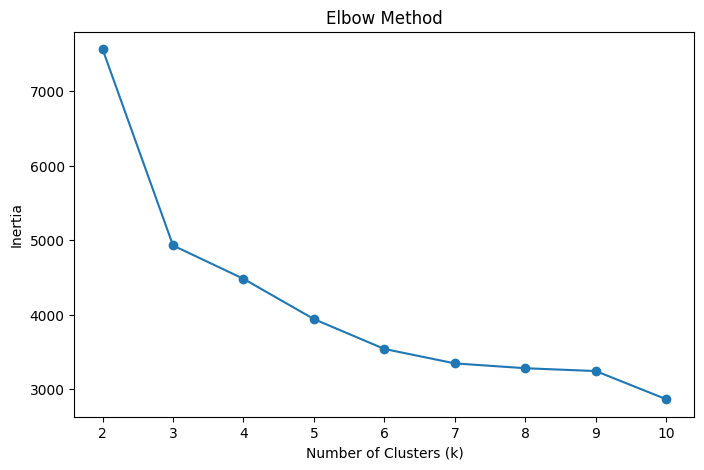

In [18]:
df_zero = df[df["diabetes"] == 0]
df_one = df[df["diabetes"] == 1]
sample_size = int(len(df_one) * 0.7)
zero_sample = df_zero.sample(n=sample_size, random_state=42)
one_sample = df_one.sample(n=sample_size, random_state=42)
sampled_df = pd.concat([zero_sample, one_sample])
data = preprocess_dataset(sampled_df)
data.drop(columns=['diabetes'], inplace=True)
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data.values)
    inertia_k = 0
    for cluster, centroid in enumerate(kmeans.centroids):
        cluster_points = data.values[kmeans.labels == cluster]
        inertia_k += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
    inertia.append(inertia_k)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Visualizing K-Means Clustering Results, Cluster Summary and Insights
- Applies the custom K-Means model with 2 clusters to the sampled dataset.
- Assigns cluster labels to data points and visualizes the clustering results.
- Features a scatter plot showing clusters using two selected features (`hypertension` and `blood_glucose_level`), with color-coded points representing cluster assignments.
- Summarizes the clustered data by analyzing the distribution of `heart_disease` and `diabetes` across the identified clusters.
- Provides detailed statistics to help understand the relationships between clusters and these categorical variables.

K-means Clustering results:


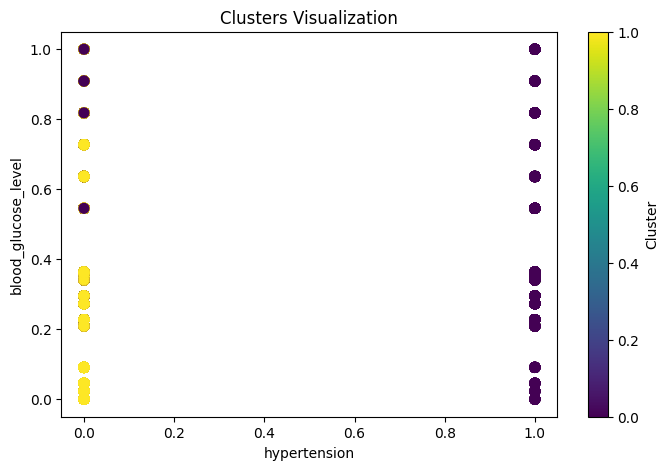

In [19]:
print("K-means Clustering results:")

kmeans_manual = KMeans(n_clusters=2)
kmeans_manual.fit(data.values)
sampled_df['Cluster'] = kmeans_manual.predict(data.values)
plt.figure(figsize=(8, 5))
plt.scatter(data['hypertension'], data['blood_glucose_level'], c=sampled_df['Cluster'], cmap='viridis', s=50)
plt.title('Clusters Visualization')
plt.xlabel('hypertension')
plt.ylabel('blood_glucose_level')
plt.colorbar(label='Cluster')
plt.show()

In [20]:
cluster_summary = sampled_df.groupby(['Cluster', 'heart_disease']).size().unstack(fill_value=0)
print(sampled_df.groupby(['Cluster', 'heart_disease']).size().unstack(fill_value=0))
print(sampled_df.groupby(['Cluster', 'diabetes']).size().unstack(fill_value=0))

heart_disease     0    1
Cluster                 
0              1519  976
1              9367   38
diabetes     0     1
Cluster             
0          448  2047
1         5502  3903


# Hierarchical Clustering Implementation and Dendrogram Visualization
- Implements a custom hierarchical clustering algorithm:
  - Starts by treating each data point as its own cluster.
  - Iteratively merges the two closest clusters based on their average linkage distance.
  - Maintains a record of merge steps, including the pair of clusters and the distance at which they were merged.
- Includes a function to calculate pairwise distances and manage the merging process.
- Visualizes the results using a dendrogram to illustrate the hierarchical structure of clusters.
- Preprocesses the dataset and selects a random sample of 100 data points for visualization.
- Uses the custom hierarchical clustering implementation to generate merge steps.
- Plots a dendrogram to represent the clustering process:
  - X-axis: Samples or intermediate clusters.
  - Y-axis: Distance at which clusters are merged.


Hierarchical Clustering results:


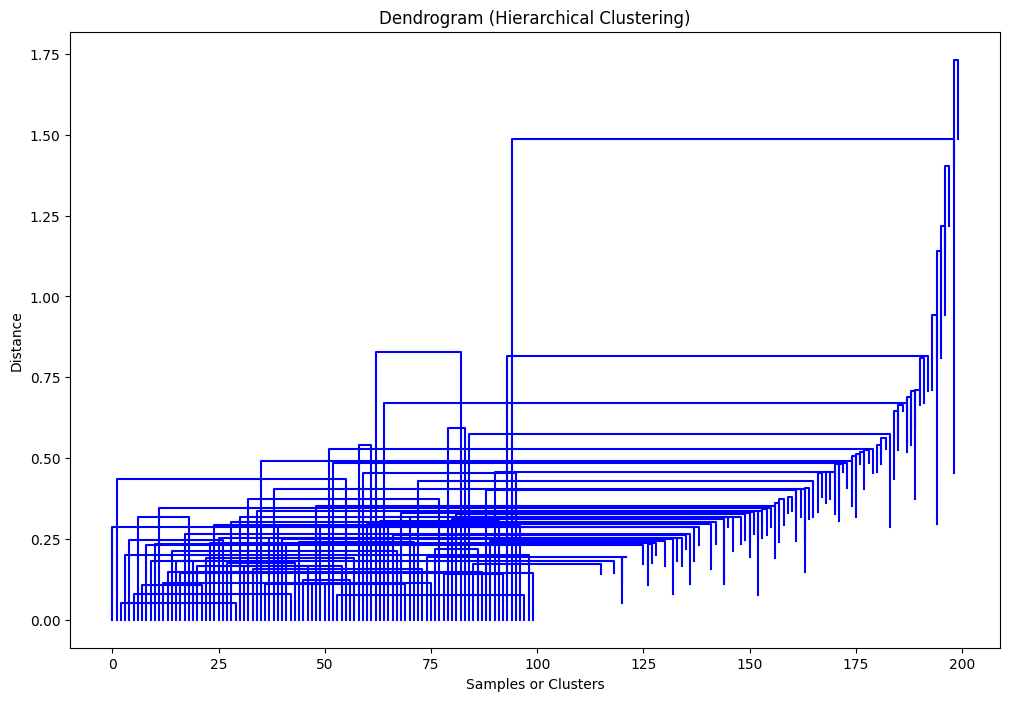

In [21]:
print("Hierarchical Clustering results:")


def calculate_distance(p1, p2):
    return np.linalg.norm(p1 - p2)


def hierarchical_clustering(X):
    n_samples = X.shape[0]
    clusters = {i: [i] for i in range(n_samples)}
    distances = {
        (i, j): calculate_distance(X[i], X[j])
        for i in range(n_samples)
        for j in range(i + 1, n_samples)
    }
    merge_steps = []
    while len(clusters) > 1:
        (cluster_i, cluster_j), min_distance = min(
            distances.items(), key=lambda x: x[1]
        )
        merge_steps.append((cluster_i, cluster_j, min_distance))
        new_cluster = clusters[cluster_i] + clusters[cluster_j]
        new_cluster_id = max(clusters.keys()) + 1
        clusters[new_cluster_id] = new_cluster
        del clusters[cluster_i]
        del clusters[cluster_j]
        distances = {
            (i, j): dist
            for (i, j), dist in distances.items()
            if i not in [cluster_i, cluster_j] and j not in [cluster_i, cluster_j]
        }
        for cluster in clusters.keys():
            if cluster != new_cluster_id:
                dist = np.mean(
                    [
                        calculate_distance(X[p1], X[p2])
                        for p1 in clusters[cluster]
                        for p2 in new_cluster
                    ]
                )
                distances[
                    min(cluster, new_cluster_id), max(cluster, new_cluster_id)
                ] = dist
    return merge_steps


def plot_dendrogram(merge_steps, n_samples):
    plt.figure(figsize=(12, 8))
    cluster_heights = {i: 0 for i in range(n_samples)}
    current_cluster_id = n_samples
    for cluster_i, cluster_j, distance in merge_steps:
        x1 = cluster_i if cluster_i < n_samples else current_cluster_id
        x2 = cluster_j if cluster_j < n_samples else current_cluster_id + 1
        y1 = cluster_heights[cluster_i]
        y2 = cluster_heights[cluster_j]
        plt.plot([x1, x1, x2, x2], [y1, distance, distance, y2], c="b")
        cluster_heights[current_cluster_id] = distance
        current_cluster_id += 1
    plt.title("Dendrogram (Hierarchical Clustering)")
    plt.xlabel("Samples or Clusters")
    plt.ylabel("Distance")
    plt.show()
    

data = preprocess_dataset(df)
data.drop(columns=["diabetes"], inplace=True)
sampled_data = data.sample(n=100, random_state=42).values
merge_steps = hierarchical_clustering(sampled_data)
plot_dendrogram(merge_steps, sampled_data.shape[0])

# Hierarchical Clustering with Scipy
- Applies Scipy's `linkage` function (using Ward's method) for hierarchical clustering on the same sample of data points.
- Generates a dendrogram using Scipy's `dendrogram` function for visualization.
- Adds a threshold line to indicate the maximum allowable distance for cluster formation.
- Extracts cluster assignments based on the defined threshold using Scipy's `fcluster` function.
- Analyzes and prints the data points assigned to each cluster for further inspection and interpretation.

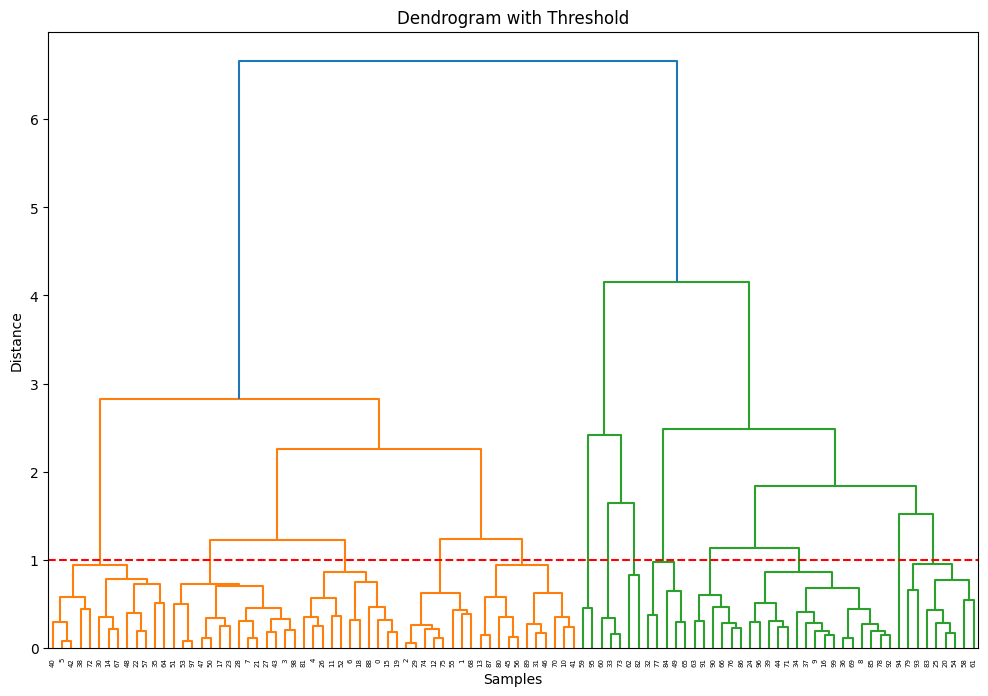

Cluster 1:
       gender       age  hypertension  heart_disease  smoking_history  \
43557       0  0.690476             0              0              0.6   
47435       0  0.357143             0              0              0.6   
7115        0  0.595238             0              0              1.0   
39354       0  0.392857             0              0              0.6   
89556       0  0.750000             0              0              0.8   
40150       0  0.750000             0              0              0.6   
48644       0  0.607143             0              0              0.8   
15057       0  0.630952             0              0              0.6   
2180        0  0.297619             0              0              1.0   
40365       0  0.500000             0              0              1.0   
20166       0  0.333333             0              0              1.0   
52461       0  0.380952             0              0              0.6   
14771       0  0.321429             0   

In [22]:
sampled_data = data.sample(n=100, random_state=42).values
linked = linkage(sampled_data, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.axhline(y=1.0, color='r', linestyle='--')
plt.title('Dendrogram with Threshold')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
threshold = 1.0
clusters = fcluster(linked, t=threshold, criterion='distance')
clustered_data = data.sample(n=100, random_state=42).copy()
clustered_data['Cluster'] = clusters
for cluster_num in np.unique(clusters):
    print(f"Cluster {cluster_num}:")
    print(clustered_data[clustered_data['Cluster'] == cluster_num])